In [2]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/content/Air_quality.csv', header=None)
df.columns = ['Country', 'State', 'City', 'StationName', 'Datetime',
              'Latitude', 'Longitude', 'Pollutant',
              'NowCastIAQI', '24HrAvgIAQI', 'SubIndex']

# Remove the first row which is the header
df = df.iloc[1:].copy()

# Convert datetime
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')

# Replace 'NA' with NaN
df.replace('NA', np.nan, inplace=True)
df[['NowCastIAQI', '24HrAvgIAQI', 'SubIndex']] = df[['NowCastIAQI', '24HrAvgIAQI', 'SubIndex']].astype(float)

# Drop rows where all IAQI values are missing
df.dropna(subset=['NowCastIAQI', '24HrAvgIAQI', 'SubIndex'], how='all', inplace=True)

# Add composite score: use 24-hour average as most stable
df['CompositeAQI'] = df['24HrAvgIAQI']

print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (2859, 12)


In [3]:
# Group by City and State, take median AQI (robust to outliers)
city_scores = df.groupby(['City', 'State'])['CompositeAQI'].agg([
    ('Avg_AQI', 'mean'),
    ('Median_AQI', 'median'),
    ('Record_Count', 'count')
]).reset_index()

# Sort by Median AQI
city_scores = city_scores.sort_values('Median_AQI', ascending=False)

# Show top 20 most polluted cities
top_polluted = city_scores.head(20)
print(top_polluted)

              City             State     Avg_AQI  Median_AQI  Record_Count
120    Kanchipuram         TamilNadu  225.500000       215.5             4
167      Nandesari           Gujarat  179.000000       202.0             3
19           Baddi  Himachal Pradesh  127.571429       105.0             7
171          Noida     Uttar_Pradesh   89.166667        91.0            24
231        Udaipur         Rajasthan   66.285714        83.0             7
87       Ghaziabad     Uttar_Pradesh   86.333333        78.0            21
173           Pali         Rajasthan   72.428571        74.0             7
73           Delhi             Delhi   81.554113        73.0           231
112       Jhalawar         Rajasthan   54.714286        72.0             7
89   Greater Noida     Uttar_Pradesh   79.615385        68.0            13
70           Dausa         Rajasthan   61.428571        66.0             7
91        Gurugram           Haryana   91.400000        66.0             5
175      Panchgaon       

In [6]:
state_summary = city_scores.groupby('State').agg(
    avg_state_aqi=('Median_AQI', 'median'),
    num_cities_monitored=('City', 'count')
).round(2).sort_values('avg_state_aqi', ascending=False)

print(state_summary)

                   avg_state_aqi  num_cities_monitored
State                                                 
Himachal Pradesh          105.00                     1
Delhi                      73.00                     1
Haryana                    65.75                     2
Punjab                     44.00                     8
Rajasthan                  42.50                    34
Andhra_Pradesh             42.00                     9
Chandigarh                 40.00                     1
Bihar                      37.75                    24
Madhya Pradesh             36.00                    13
Maharashtra                34.50                    31
Telangana                  33.00                     1
Uttar_Pradesh              33.00                    19
Gujarat                    31.00                     7
Jharkhand                  30.75                     2
West_Bengal                30.50                     7
Kerala                     27.75                     4
Odisha    

/tmp/ipython-input-225535701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_polluted.head(10), y='City', x='Median_AQI', palette='Reds_r')


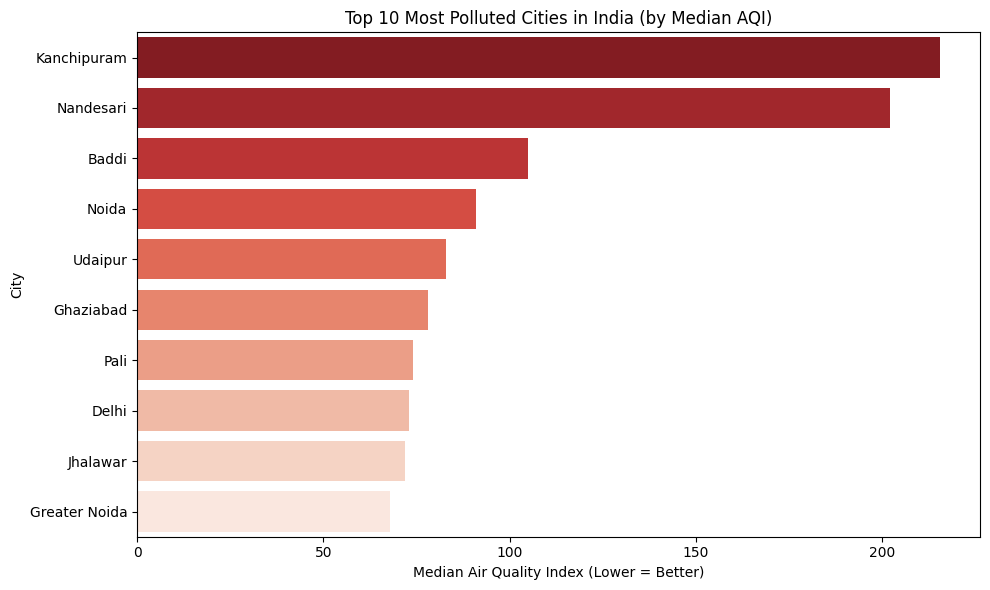

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_polluted.head(10), y='City', x='Median_AQI', palette='Reds_r')
plt.title("Top 10 Most Polluted Cities in India (by Median AQI)")
plt.xlabel("Median Air Quality Index (Lower = Better)")
plt.ylabel("City")
plt.tight_layout()
plt.savefig("top_10_polluted_cities.png", dpi=150)
plt.show()

## Insights and Findings

Based on the analysis of the air quality data:

### Top Polluted Cities
The top 20 most polluted cities based on the median Composite AQI are: